<a href="https://www.kaggle.com/code/marwaelsherif/iris-classification?scriptVersionId=118599433" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier




# **Loading dataset**

In [2]:
df=pd.read_csv('/kaggle/input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# **Preprocessing the dataset**

In [4]:
#to check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.drop_duplicates()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df=df.drop_duplicates()

In [7]:
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# **Data Analysis**

In [8]:
colors=['red','orange','green']
classes = ['Iris-virginica','Iris-versicolor','Iris-setosa']

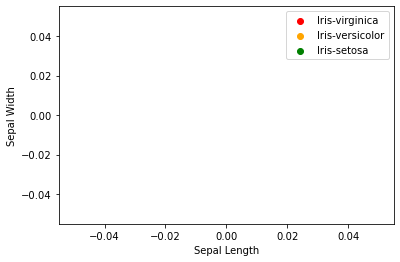

In [9]:
for i in range(3):
    x = df[df['Species'] == classes[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=classes[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
    

# **Correlation**

In [10]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058,0.782904
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883,0.948339
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000,0.955693
Species,0.782904,-0.418348,0.948339,0.955693,1.000000


<AxesSubplot:>

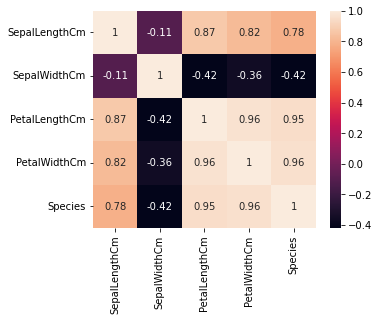

In [11]:
corr=df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax)

# **Model Training**

In [12]:
x=df.drop(columns=['Species'])
y=df['Species']
print(x)


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[147 rows x 4 columns]


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)

In [14]:
model=LogisticRegression()

In [15]:
model.fit(x_train,y_train)

LogisticRegression()

In [16]:
print('accuracy= ',model.score(x_test,y_test)*100)

accuracy=  91.11111111111111


In [17]:
model=KNeighborsClassifier(n_neighbors=5)

In [18]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [19]:
print('accuracy= ',model.score(x_test,y_test)*100)

accuracy=  95.55555555555556


In [20]:
ypred=model.predict(x_test)

In [21]:
print(ypred)

[0 0 2 2 2 2 0 2 0 1 0 0 1 2 1 0 1 1 2 1 0 2 0 1 2 2 1 1 2 0 1 2 1 0 1 1 1
 0 2 2 1 0 2 2 1]
